INFO:root:Finish loading graphs.
INFO:root:Nodes train: 242
INFO:root:Simplicies train: 12704


number of simplices: 106879
number of unique simplices: 12704
Node index should begin with 0, reindexing the hypergraphs ...
number of nodes in construct graph 242


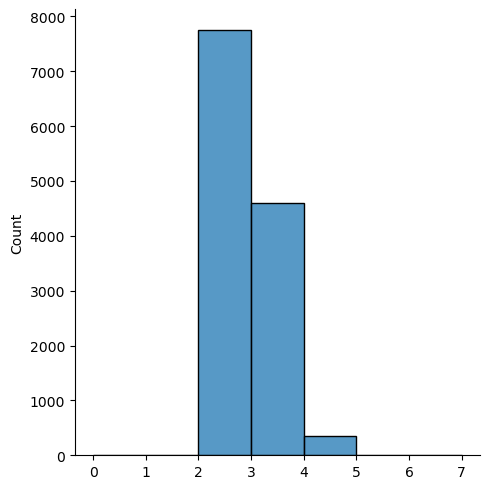

In [3]:
# load the hypergraph
import yaml
import logging
import os
import sys
import random

import numpy as np
import seaborn as sns
import networkx as nx

from utils import load_graphs
from cliques import compute_cliques


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()
logger.setLevel(logging.INFO)

config  = yaml.safe_load(open('./config.yaml'))
config['dataset'] = 'contact-primary-school'
graphs = load_graphs(config, logger)


data = np.array([len(s) for s in graphs['simplicies_train']])
hist, bins = np.histogram(data, bins=np.linspace(1, 8, 8))
sns.displot(data, bins=range(8))

INFO:root:Start computing cliques
INFO:root:Found cache for max cliques train
INFO:root:Number of maximum cliques:100153
INFO:root:Optimizing clique sampler .. 
INFO:root:Found cache for rho.
INFO:root:[(3, 2), (4, 2), (24, 2), (25, 2), (5, 2), (25, 3), (22, 2), (6, 2), (24, 3), (22, 3), (4, 3), (5, 3), (21, 2), (6, 3), (7, 2), (7, 3)]
INFO:root:Optimize Clique Sampler: #hyperedges collected:10137, recall: 0.7979376574307305, efficiency:0.028962857142857144
INFO:root:Clique analysis done.


(0, 0), (72, 66), (1716, 966), (2268, 1252), (2868, 1554), (9988, 3493), (14588, 3991), (24059, 4981), (48899, 6788), (52947, 7060), (116087, 8351), (117183, 8368), (124303, 8469), (158953, 8924), (192073, 9216), (270424, 9805), 
len of origin:349979, len of deduplicates： 61125


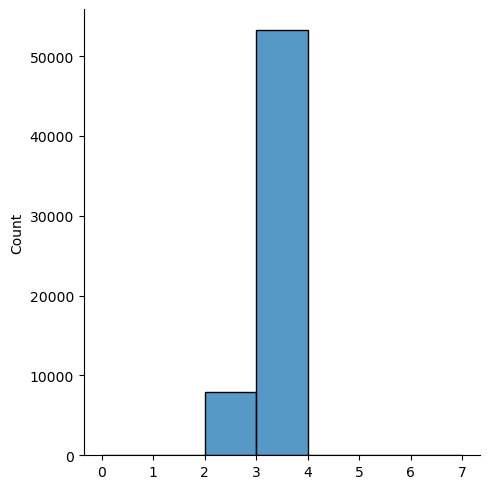

In [5]:
# # sampling cliques
# os.remove(f'{config['data_dir']}/{config['dataset']}/cliques_train.pkl')
# os.remove(f'{config['data_dir']}/{config['dataset']}/rho.pkl')

cliques = compute_cliques(graphs, config, logger)
sample_cliques_table = cliques['children_cliques_train']
# print(sample_cliques_table)

sample_cliques = []

for v in sample_cliques_table.values():
    sample_cliques = sample_cliques + v

sample_cliques = [list(c) for c in sample_cliques]
set_sample_cliques = list(set([tuple(sorted(e)) for e in sample_cliques]))
print(f'len of origin:{len(sample_cliques)}, len of deduplicates： {len(set_sample_cliques)}')

# random.shuffle(set_sample_hyperedges)
sample_clique_sizes = [len(c) for c in set_sample_cliques]
data = np.array(sample_clique_sizes)
hist, bins = np.histogram(data, bins=np.linspace(0, 5, 6))
sns.displot(data, bins=range(8))

In [1]:
import utils
# from utils import lazy_clique_edge_cover
from importlib import reload
reload(utils)

# reconstruct the hypergraph by clique cover
G = graphs['G_weighted']

# YOU GUY!!!!!!!!!!!!!!!!!!!!!!
# BAD API!!!!!!!!!!!!!!!!!!!!!!
weighted_adjacency_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
reconstruct_hyperedges = utils.lazy_clique_edge_cover(weighted_adjacency_matrix, set_sample_cliques, len(graphs['simplicies_train']))
reconstruct_hyperedges_sizes = [len(e) for e in reconstruct_hyperedges]

data = np.array(reconstruct_hyperedges_sizes)
hist, bins = np.histogram(data, bins=np.linspace(0, 5, 6))
sns.displot(data, bins=range(8))

NameError: name 'graphs' is not defined

In [103]:
# print(reconstruct_hyperedges)
set_reconstruct_hyperedges = set([tuple(sorted(e)) for e in reconstruct_hyperedges])
print(f'len: {len(set_reconstruct_hyperedges)}, {set_reconstruct_hyperedges}')
print(f'len: {len(set_reconstruct_hyperedges)}, {set_reconstruct_hyperedges}')

precision, recall, f1, jaccard = utils.get_performance_wrt_ground_truth(set_reconstruct_hyperedges, graphs['simplicies_train'])
print(f'precision: {precision}, recall: {recall}, f1: {f1}, jaccard: {jaccard}')


len: 7818, {(8, 140, 144), (132, 268), (247, 255), (268, 284, 287), (49, 270), (30, 78, 174), (240, 265, 283), (214, 241, 256), (34, 147), (55, 244, 260), (199, 214), (178, 260, 265), (59, 125, 182), (11, 149, 201), (74, 148, 293), (0, 270), (33, 202, 207), (160, 222), (24, 26, 166), (27, 107), (65, 100, 178), (107, 178, 185), (136, 279), (48, 166), (139, 284), (254, 271), (20, 21, 39), (8, 83, 175), (21, 48, 166), (48, 74, 270), (83, 160), (127, 166), (48, 183, 213), (16, 106), (82, 121, 126), (60, 208, 224), (48, 58), (10, 144, 304), (92, 101), (63, 113, 126), (97, 179), (144, 165, 257), (59, 147, 183), (88, 103, 215), (27, 120), (260, 263, 285), (31, 60, 106), (11, 112), (81, 126, 301), (131, 177), (79, 80, 130), (160, 190, 209), (222, 295), (141, 201, 279), (202, 207, 293), (48, 179), (12, 93, 107), (34, 281), (37, 100, 113), (87, 107), (71, 79, 151), (106, 120), (17, 111, 294), (133, 223), (48, 72, 173), (108, 166), (154, 282), (99, 117), (83, 138, 197), (81, 110, 185), (37, 160, 